549
32596 16125 48721 77279 290859
0.33096611317501695 25576 96264


W1013 01:26:05.440027 140173844076288 deprecation.py:506] From /home/skuznik/local/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(137961, 17)
32590 137961
32596 16125 0 0
16121 25576 96264


W1013 01:26:05.833228 140173844076288 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W1013 01:26:05.899797 140173844076288 deprecation.py:323] From /home/skuznik/local/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14, 14, 17, 3)]   0         
_________________________________________________________________
conv3d (Conv3D)              (None, 14, 14, 17, 64)    5248      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 14, 14, 17, 32)    55328     
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 14, 14, 17, 32)    27680     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 7, 7, 8, 32)       0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 7, 7, 8, 32)       27680     
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 7, 7, 8, 16)       13840 

31/31 [==============================] - 68s 2s/step - loss: 0.6923 - acc: 0.5734 - mean_squared_error: 0.2496 - val_loss: 0.6932 - val_acc: 0.4757 - val_mean_squared_error: 0.2500
Epoch 30/500
31/31 [==============================] - 68s 2s/step - loss: 0.6923 - acc: 0.5739 - mean_squared_error: 0.2496 - val_loss: 0.6932 - val_acc: 0.4715 - val_mean_squared_error: 0.2500
Epoch 31/500
31/31 [==============================] - 68s 2s/step - loss: 0.6922 - acc: 0.5760 - mean_squared_error: 0.2495 - val_loss: 0.6932 - val_acc: 0.4680 - val_mean_squared_error: 0.2500
Epoch 32/500
31/31 [==============================] - 68s 2s/step - loss: 0.6921 - acc: 0.5756 - mean_squared_error: 0.2495 - val_loss: 0.6932 - val_acc: 0.4646 - val_mean_squared_error: 0.2500
Epoch 33/500
31/31 [==============================] - 68s 2s/step - loss: 0.6920 - acc: 0.5773 - mean_squared_error: 0.2495 - val_loss: 0.6932 - val_acc: 0.4609 - val_mean_squared_error: 0.2500
Epoch 34/500
31/31 [=======================

31/31 [==============================] - 68s 2s/step - loss: 0.6893 - acc: 0.5750 - mean_squared_error: 0.2481 - val_loss: 0.6938 - val_acc: 0.4494 - val_mean_squared_error: 0.2503
Epoch 72/500
31/31 [==============================] - 68s 2s/step - loss: 0.6893 - acc: 0.5735 - mean_squared_error: 0.2481 - val_loss: 0.6938 - val_acc: 0.4493 - val_mean_squared_error: 0.2503
Epoch 73/500
31/31 [==============================] - 68s 2s/step - loss: 0.6893 - acc: 0.5730 - mean_squared_error: 0.2481 - val_loss: 0.6938 - val_acc: 0.4492 - val_mean_squared_error: 0.2503
Epoch 74/500
31/31 [==============================] - 68s 2s/step - loss: 0.6892 - acc: 0.5736 - mean_squared_error: 0.2480 - val_loss: 0.6939 - val_acc: 0.4487 - val_mean_squared_error: 0.2504
Epoch 75/500
31/31 [==============================] - 68s 2s/step - loss: 0.6891 - acc: 0.5726 - mean_squared_error: 0.2480 - val_loss: 0.6939 - val_acc: 0.4482 - val_mean_squared_error: 0.2504
Epoch 76/500
31/31 [=======================

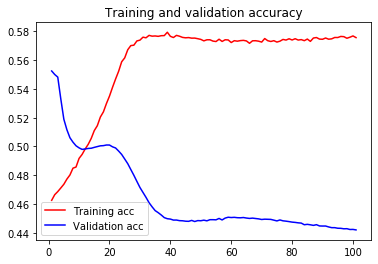

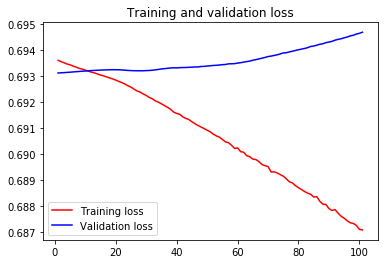

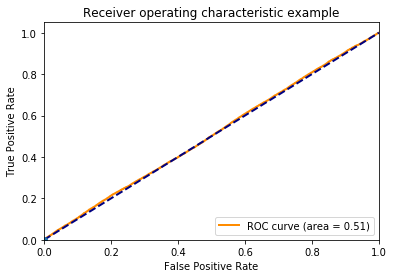

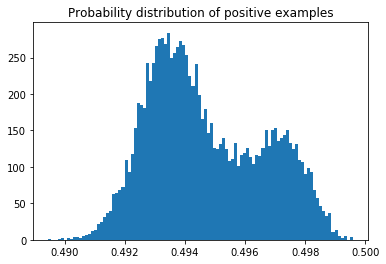

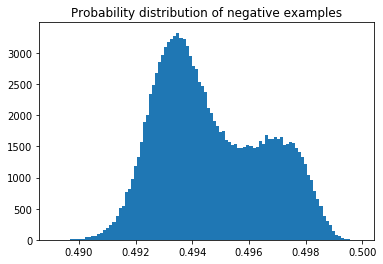

/home/skuznik/local/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


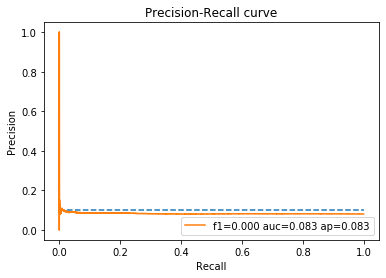

level 2
[[127023      0]
 [ 10193      0]] 0.93 0.51


IndexError: index 0 is out of bounds for axis 0 with size 0

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics

import random
random.seed(7)


def generator(X, Y, batch_size=32, train=True):
    while True:
        for offset in range(0, len(X), batch_size):
            X_batch = np.stack(X[offset:offset+batch_size], axis=0)
            Y_batch = np.stack(Y[offset:offset+batch_size], axis=0)
            
            if train:
                Y_f = np.array(list(map(lambda x:np.sum(np.sum(x, axis=0), axis=0), Y_batch)))
                Y_f[Y_f > 0] = 1
                
            
                yield (X_batch, Y_f)
            else:
                yield X_batch

structure_ids = []   
for line in open('./structures lists/stucture ids homo sapiens.txt', 'r'):
    line = line.strip('\n').lower()
    structure_ids.append(line)
for line in open('./structures lists/stucture ids synthetic construct.txt', 'r'):
    line = line.strip('\n').lower()
    structure_ids.append(line)
for line in open('./structures lists/stucture ids virus.txt', 'r'):
    line = line.strip('\n').lower()
    structure_ids.append(line)

structure_ids.remove('1a9n')
structure_ids.remove('2adc')
random.shuffle(structure_ids)
print(len(structure_ids))

num_test = int(len(structure_ids)*0.3)
pp_train = 0
pp_test = 0
pos = 0
neg = 0
for i, structure_id in enumerate(structure_ids):
    rna = np.load('../data/voxelized data 14x14x17 2/' + structure_id + '_rna_3D.npy')

    pp = 0
    p = 0
    n = 0
    for bb in rna:
        n_nucleotides = np.sum(bb)
        if n_nucleotides >= 10:
            pp +=1
        if 100 > n_nucleotides > 0:
            p +=1
        if n_nucleotides == 0:
            n +=1
    pos +=p
    neg +=n
    if i <= num_test:
        pp_test +=pp
    else:
        pp_train +=pp

proc_test = pp_test/(pp_test+pp_train)
pos_test = int(pos*proc_test)
neg_test = int(neg*proc_test)

print(pp_train, pp_test, (pp_train + pp_test), pos, neg)
print(proc_test, pos_test, neg_test)

X_train = []
X_test = []
Y_train = []
Y_test = []
num_aa_train = 0
num_aa_test = 0
num_pp = 0
num_p = 0
num_n = 0
for j, structure_id in enumerate(structure_ids):
    protein = np.load('../data/voxelized data 14x14x17 2/' + structure_id + '_protein.npy')
    rna = np.load('../data/voxelized data 14x14x17 2/' + structure_id + '_rna_3D.npy')

    k = 0
    pp_ = 0
    while (np.sum(rna[k]) >= 10) and (k < len(rna)-1):
        pp_ +=1
        k +=1

    if j <= num_test:
        X_test.extend(protein[:pp_, :, :, :, :3])
        Y_test.extend(rna[:pp_])
        num_aa_test +=pp_
        num_pp +=pp_

    else:
        X_train.extend(protein[:pp_, :, :, :, :3])
        Y_train.extend(rna[:pp_])
        num_aa_train +=pp_

    p_= 0 
    while (100 > np.sum(rna[k]) > 0)  and (k < len(rna)-1):
        if (pos_test > 0):
            p_ +=1
            pos_test -=1
        k +=1


    X_test.extend(protein[pp_:(pp_+p_), :, :, :, :3])
    Y_test.extend(rna[pp_:(pp_+p_)])
    num_aa_test +=p_
    num_p +=p_

    n_= 0
    while (np.sum(rna[k]) == 0) and (neg_test > 0) and (k < len(rna)-1):
        n_ +=1
        neg_test -=1
        k +=1

    X_test.extend(protein[(pp_+p_):(pp_+p_+n_), :, :, :, :3])
    Y_test.extend(rna[(pp_+p_):(pp_+p_+n_)])
    num_aa_test +=n_
    num_n +=n_


Y_test_ = np.array(list(map(lambda x:np.sum(np.sum(x, axis=0), axis=0), Y_test)))
Y_test_[Y_test_ > 0] = 1


print(Y_test_.shape)

n_steps_train = int(num_aa_train/1024) 
n_steps_test = int(num_aa_test/1024)

print(num_aa_train, num_aa_test)

print(pp_train, pp_test, pos_test, neg_test)
print(num_pp, num_p, num_n)

generator_train = generator(X_train, Y_train, 1024, True)
generator_validation = generator(X_test, Y_test, 1024, True)
generator_test = generator(X_test, Y_test, 1024, False)

ins = tf.keras.layers.Input((14, 14, 17, 3))
con1 = tf.keras.layers.Conv3D(filters=64, kernel_size=(3, 3, 3), padding='same', activation='relu')(ins)
con2 = tf.keras.layers.Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same', activation='relu')(con1)
con3 = tf.keras.layers.Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same', activation='relu')(con2)
maxp1 = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2))(con3)
con4 = tf.keras.layers.Conv3D(filters=32, kernel_size=(3, 3, 3), padding='same', activation='relu')(maxp1)
con5 = tf.keras.layers.Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='relu')(con4)
con6 = tf.keras.layers.Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='relu')(con5)
maxp2 = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2))(con6)
con7 = tf.keras.layers.Conv3D(filters=16, kernel_size=(3, 3, 3), padding='same', activation='relu')(maxp2)
con8 = tf.keras.layers.Conv3D(filters=8, kernel_size=(3, 3, 3), padding='same', activation='relu')(con7)
con9 = tf.keras.layers.Conv3D(filters=4, kernel_size=(3, 3, 3), padding='same', activation='relu')(con8)
maxp3 = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2))(con9)
batch = tf.keras.layers.BatchNormalization()(maxp3)
flat = tf.keras.layers.Flatten()(batch)
dens2 = tf.keras.layers.Dense(units=256, activation='relu')(flat)
drop2 = tf.keras.layers.Dropout(0.6)(dens2)
outs = tf.keras.layers.Dense(units=17, activation='sigmoid')(drop2)
model = tf.keras.models.Model(inputs=ins, outputs=outs)
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy', 'mse'])

model.summary()

# checkpoint
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, mode='min', min_delta=0.0001)
# mc = tf.keras.callbacks.ModelCheckpoint("weights_best.hdf5", monitor='val_loss', verbose=0, save_best_only=True, mode='min')

# model.fit(X_train, Y_train_f, validation_split=0.33, epochs=1, batch_size=200, callbacks=callbacks_list, verbose=0)
history = model.fit_generator(generator_train, steps_per_epoch=n_steps_train, epochs=500, 
                    validation_data = generator_validation, validation_steps=n_steps_test, callbacks=[es], verbose=1)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('accuracy_17')
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss_17')


# model_best = model
# model_best.load_weights("weights_best.hdf5")
# print(model.evaluate(X_test, Y_test, verbose=0, batch_size=100))
# model_best.save('model_cnn_15_2.h5')
# Y_pred = model_best.predict(X_test, batch_size=200)
Y_pred_prob = model.predict_generator(generator_test, steps=n_steps_test)
print(Y_pred_prob.shape)

Y_pred_ = np.copy(Y_pred_prob)
Y_pred_[Y_pred_ >= 0.5] = 1
Y_pred_[Y_pred_ < 0.5] = 0

print(Y_pred_.shape)
print(Y_test_.shape)
Y_test_ = Y_test_[:Y_pred_.shape[0]]

#CNN
print('CNN: \n')

for i in range(17):
    print(f'level {i+1}')
    confusion_matrix = sklearn.metrics.confusion_matrix(Y_test_[:,i], Y_pred_[:, i])
    accuracy = np.round(np.sum(np.trace(confusion_matrix))/np.sum(confusion_matrix), 2)
    auc = np.round(sklearn.metrics.roc_auc_score(Y_test_[:,i], Y_pred_prob[:,i]), 2)
    print(confusion_matrix, accuracy, auc)
    
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(Y_test_[:,i], Y_pred_prob[:,i])
    our_thr = np.where(np.round(thresholds, 2) == 0.5)[0][0]
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.plot(fpr[our_thr], tpr[our_thr], 'o')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.savefig(f'roc_curve_{i+1}')
    plt.show()

    plt.hist(Y_pred_prob[np.where(Y_test_[:,i]==1)[0], i], bins=100)
    plt.title('Probability distribution of positive examples')
    plt.savefig(f'positive_hist_{i+1}')
    plt.show()

    plt.hist(Y_pred_prob[np.where(Y_test_[:,i]==0)[0], i], bins=100)
    plt.title('Probability distribution of negative examples')
    plt.savefig(f'negative_hist_{i+1}')
    plt.show()
    
    precision, recall, _ = sklearn.metrics.precision_recall_curve(Y_test_[:,i], Y_pred_prob[:,i])
    # calculate F1 score
    f1 = sklearn.metrics.f1_score(Y_test_[:,i], Y_pred_[:,i])
    # calculate precision-recall AUC
    pr_auc = sklearn.metrics.auc(recall, precision)
    # calculate average precision score
    ap = sklearn.metrics.average_precision_score(Y_test_[:,i], Y_pred_prob[:,i])

    plt.plot([0, 1], [0.1, 0.1], linestyle='--')
    plt.plot(recall, precision, label='f1=%.3f auc=%.3f ap=%.3f' % (f1, pr_auc, ap))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower right")
    plt.show()

# baseline model
# predict all zeros; at least 50% correct predictions because there are 1/2 of negative examples
Y_pred_base = np.zeros(Y_test_.shape)

# po = np.sum(Y_train, axis=0)/Y_train.shape[0]
# po[po >= 0.5] = 1
# po[po < 0.5] = 0
# Y_pred_base = np.tile(po, (Y_test.shape[0],1))

print(Y_pred_base.shape)
print(f'\n BASELINE MODEL: \n')

confusion_matrix_base = [sklearn.metrics.confusion_matrix(Y_test_[:,i], Y_pred_base[:,i]) for i in range(17)]
accuracy_base = [np.sum(np.trace(cm))/np.sum(cm) for cm in confusion_matrix_base]
auc_base = [sklearn.metrics.roc_auc_score(Y_test_[:, i], Y_pred_base[:,i]) for i in range(17)]

for q in range(17):
    print(f'level {q+1}')
    print(confusion_matrix_base[q], np.round(accuracy_base[q], 2), np.round(auc_base[q], 2))

#random model
Y_pred_random = np.random.random(Y_test_.shape)
Y_pred_random[Y_pred_random >= 0.5] = 1
Y_pred_random[Y_pred_random < 0.5] = 0

print(f'\n RANDOM MODEL: \n')

confusion_matrix_random = [sklearn.metrics.confusion_matrix(Y_test_[:,i], Y_pred_random[:,i]) for i in range(17)]
accuracy_random = [np.sum(np.trace(cm))/np.sum(cm) for cm in confusion_matrix_random]
auc_random = [sklearn.metrics.roc_auc_score(Y_test_[:,i], Y_pred_random[:,i]) for i in range(17)]

for q in range(17):
    print(f'level {q+1}')
    print(confusion_matrix_random[q], np.round(accuracy_random[q], 2), np.round(auc_random[q], 2))